In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("F:\sruti\study\perrin-freres-monthly-champagne.csv")

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.columns=['Month','Sales']

In [6]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.tail()


,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
df=df.dropna()

In [10]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [12]:
df['Month']=pd.to_datetime(df['Month'])

In [13]:
df

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [17]:
df.set_index('Month',inplace=True)

In [18]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

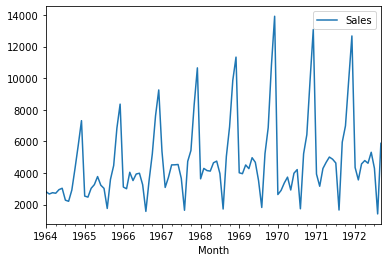

In [19]:
df.plot()

In [37]:
rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()
print(rolmean,rolstd)

                  Sales  Sales First Difference  Seasonal First Difference
Month                                                                     
1964-01-01          NaN                     NaN                        NaN
1964-02-01          NaN                     NaN                        NaN
1964-03-01          NaN                     NaN                        NaN
1964-04-01          NaN                     NaN                        NaN
1964-05-01          NaN                     NaN                        NaN
...                 ...                     ...                        ...
1972-05-01  5709.500000              -32.666667                 245.166667
1972-06-01  5746.000000               36.500000                 207.666667
1972-07-01  5718.083333              -27.916667                 145.083333
1972-08-01  5697.583333              -20.500000                 131.166667
1972-09-01  5691.416667               -6.166667                  64.166667

[105 rows x 3 columns]  

Text(0.5, 1.0, 'Mean and Standard Deviation')

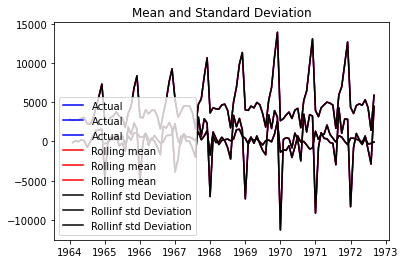

In [41]:
orig_data=plt.plot(df,color='blue',label='Actual')
rol_mean=plt.plot(df,color='red',label='Rolling mean')
rol_std=plt.plot(df,color='black',label="Rollinf std Deviation")
plt.legend(loc='best')
plt.title("Mean and Standard Deviation")


In [21]:
from statsmodels.tsa.stattools import adfuller
tresults=adfuller(df['Sales'])

In [22]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [23]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276228
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [28]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)


In [27]:
df.head(15)

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
1964-06-01,3036.0,90.0
1964-07-01,2282.0,-754.0
1964-08-01,2212.0,-70.0
1964-09-01,2922.0,710.0


In [29]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [30]:
df.head(15)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [31]:
adfuller_test(df["Seasonal First Difference"].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

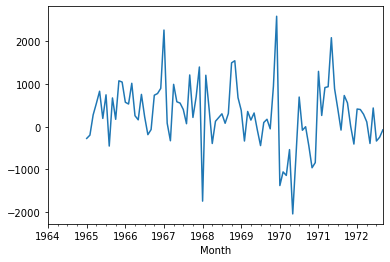

In [32]:
df['Seasonal First Difference'].plot()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorelation Plot')

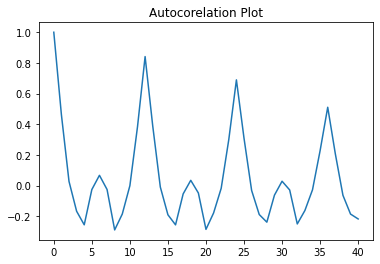

In [60]:
from statsmodels.tsa.stattools import acf,pacf
tr_acf=acf(df['Sales'])
tr_pacf=pacf(df['Sales'],nlags=20,method='ols')
plt.plot(tr_acf)
plt.title("Autocorelation Plot")

Text(0.5, 1.0, 'Partial corelation Plot')

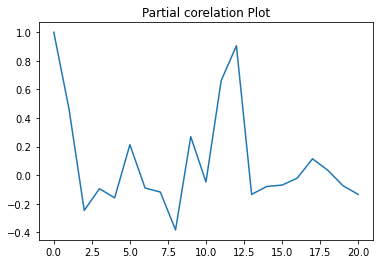

In [61]:
plt.plot(tr_pacf)
plt.title("Partial corelation Plot")

In [83]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [63]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Mon, 28 Nov 2022   AIC                           1910.251
Time:                        15:24:04   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7846     12.405      1.837      0.066      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

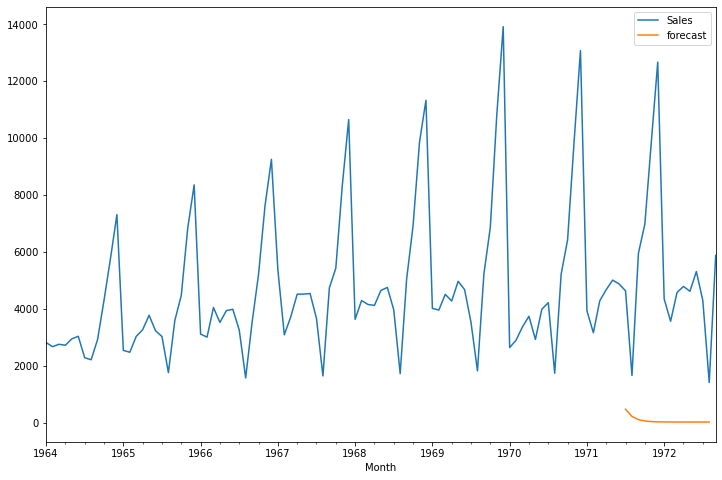

In [64]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [65]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

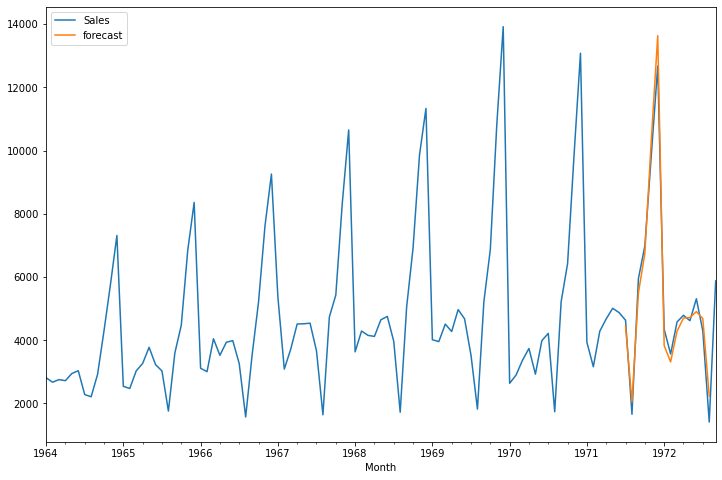

In [66]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [76]:
predictions_ARIMA_diff=pd.Series(model_fit.fittedvalues,copy=True)
print(predictions_ARIMA_diff.tail())

Month
1972-05-01     650.099510
1972-06-01     751.150770
1972-07-01     370.922917
1972-08-01     944.136259
1972-09-01    2552.654253
dtype: float64


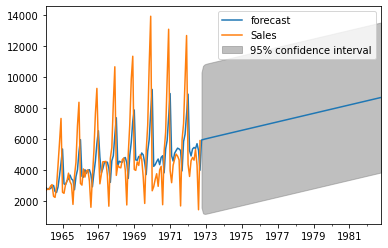

In [80]:
model_fit.plot_predict(1,225)
x=model_fit.forecast(steps=120)

In [81]:
model_fit.forecast(steps=120)

(array([5917.46191592, 5947.92458978, 5974.04413573, 5998.2772627 ,
        6021.69103168, 6044.74891603, 6067.65222342, 6090.48839097,
        6113.29539661, 6136.08973591, 6158.87857363, 6181.66502177,
        6204.450432  , 6227.23539143, 6250.02015504, 6272.80483361,
        6295.58947524, 6318.37410082, 6341.15871943, 6363.94333502,
        6386.72794929, 6409.51256299, 6432.29717644, 6455.08178979,
        6477.86640309, 6500.65101637, 6523.43562963, 6546.2202429 ,
        6569.00485616, 6591.78946943, 6614.57408269, 6637.35869595,
        6660.14330921, 6682.92792247, 6705.71253574, 6728.497149  ,
        6751.28176226, 6774.06637552, 6796.85098879, 6819.63560205,
        6842.42021531, 6865.20482857, 6887.98944183, 6910.7740551 ,
        6933.55866836, 6956.34328162, 6979.12789488, 7001.91250815,
        7024.69712141, 7047.48173467, 7070.26634793, 7093.05096119,
        7115.83557446, 7138.62018772, 7161.40480098, 7184.18941424,
        7206.9740275 , 7229.75864077, 7252.54325